# Data Science Salaries 2023

#### VARIABLES

<table>
  <tr>
    <th>Nombre de la columna</th>
    <th>Descripción</th>
  </tr>
  <tr>
    <td>work_year</td>
    <td>El año en que se pagó el salario.</td>
  </tr>
  <tr>
    <td>experience_level</td>
    <td>El nivel de experiencia en el trabajo durante el año.</td>
  </tr>
  <tr>
    <td>employment_type</td>
    <td>El tipo de empleo para el rol.</td>
  </tr>
  <tr>
    <td>job_title</td>
    <td>El rol desempeñado durante el año.</td>
  </tr>
  <tr>
    <td>salary</td>
    <td>El total bruto del salario pagado.</td>
  </tr>
  <tr>
    <td>salary_currency</td>
    <td>La moneda del salario pagado como código de moneda ISO 4217.</td>
  </tr>
  <tr>
    <td>salaryinusd</td>
    <td>El salario en dólares estadounidenses (USD).</td>
  </tr>
  <tr>
    <td>employee_residence</td>
    <td>El principal país de residencia del empleado durante el año de trabajo como código de país ISO 3166.</td>
  </tr>
  <tr>
    <td>remote_ratio</td>
    <td>La cantidad total de trabajo realizado a distancia.</td>
  </tr>
  <tr>
    <td>company_location</td>
    <td>El país de la oficina principal del empleador o la sucursal contratante.</td>
  </tr>
  <tr>
    <td>company_size</td>
    <td>El número mediano de personas que trabajaron para la empresa durante el año.</td>
  </tr>
</table>


### Primer paso, la carga de datos, limpieza, exploración y primera comprensión de nuestro dataset

#### Importamos las librerías necesarias:


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#### Cargamos nuestro dataset


In [14]:
df = pd.read_csv('datos/ds_salaries.csv')

In [15]:
df.head(15)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


¿Cuántas entradas (filas) y variables (columnas) tiene el conjunto de datos?

In [16]:
df.shape

(3755, 11)

¿Qué tipos de datos contiene cada columna? 

In [17]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [18]:
def tipo_de_columnas_ordenadas(df):
    # Inicializa listas vacías para almacenar las columnas categóricas y numéricas
    cat = []
    num = []
    
    # Itera sobre las columnas del DataFrame
    for col in df.columns:
        # Comprueba si el tipo de datos de la columna es 'object' (categórica)
        if df[col].dtype == 'object':
            # Si es categórica, añádela a la lista de columnas categóricas
            cat.append(col)
        else:
            # Si no es categórica, añádela a la lista de columnas numéricas
            num.append(col)
    # Devuelve las listas de columnas categóricas y numéricas
    return cat, num

# Llama a la función para obtener las listas de columnas categóricas y numéricas
cat, num = tipo_de_columnas_ordenadas(df)

# Imprime las listas resultantes
print('Las columnas categoricas son: ', cat)
print('Las columnas numericas son: ', num)

Las columnas categoricas son:  ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']
Las columnas numericas son:  ['work_year', 'salary', 'salary_in_usd', 'remote_ratio']


¿Existen valores faltantes en el conjunto de datos? 

No hay valores nulos en todo el dataset


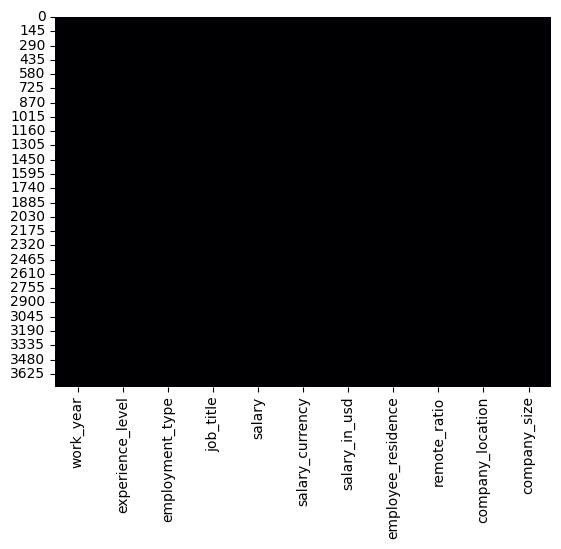

In [19]:
sns.heatmap(df.isnull(), cbar=False, cmap='magma')

print('No hay valores nulos en todo el dataset')

#### ¿Cúal es la distribución que presentan las variables de nuestro dataset?

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
remote_ratio,3755.0,46.271638,48.589050,0.0,0.0,0.0,100.0,100.0


#### Crea una gráfica para visualizar nuestras variables numéricas:

In [21]:
# Lista de columnas para graficar
cols = ['work_year', 'salary', 'salary_in_usd', 'remote_ratio']

# Crea un objeto de subgráficos con una fila y cuatro columnas
fig = make_subplots(rows=1, cols=4)

# Itera sobre las columnas y añade un histograma para cada una al objeto de subgráficos
for i, col in enumerate(cols):
    # Añade un histograma para la columna actual al subgráfico correspondiente
    fig.add_trace(go.Histogram(x=df[col], nbinsx=20, name=f'Distribución de {col}'), row=1, col=i+1)
 
# Configura el tamaño y el título del gráfico
fig.update_layout(height=500, width=1200, title_text='Distribución de Variables Numéricas', showlegend=True)

# Centra el título del gráfico
fig.update_layout(title=dict(x=0.5))

# Muestra el gráfico
fig.show()

#### Crea una gráfica para visualizar nuestras variables categóricas:

In [42]:
# Lista de columnas para graficar
cols = ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_size', 'company_location']

# Crea un objeto de subgráficos con 3 filas y 3 columnas, y establece los títulos de los subgráficos como las columnas
fig = make_subplots(rows=3, cols=3, subplot_titles=cols)

# Itera sobre las columnas y añade un histograma para cada una al objeto de subgráficos
for i, col in enumerate(cols):
    row = i // 3 + 1
    col = i % 3 + 1
    fig.add_trace(go.Histogram(x=df[cols[i]], nbinsx=20, name=f'Distribución de {cols[i]}'), row=row, col=col)
    
# Oculta las etiquetas de los ejes y en el último subgráfico de la tercera fila
fig.update_yaxes(showticklabels=False, row=3, col=3)

# Configura el tamaño y el título del gráfico
fig.update_layout(height=1600, width=1500, title_text='Distribución de Variables Categóricas', showlegend=True)

# Centra el título del gráfico
fig.update_layout(title=dict(x=0.5))

# Ajusta el ángulo de las etiquetas del eje x para mayor legibilidad
fig.update_xaxes(tickangle=90)

# Muestra el gráfico
fig.show()

#### Identifica los outliers de nuestro dataset de forma gráfica: 

In [23]:
# Lista de columnas para graficar
cols = ['work_year', 'salary', 'salary_in_usd']

# Crea un objeto de subgráficos con una fila y tres columnas
fig = make_subplots(rows=1, cols=3)

# Itera sobre las columnas y añade un gráfico de caja para cada una al objeto de subgráficos
for i, col in enumerate(cols):
    fig.add_trace(go.Box(x=df[col], name=f'{col}'), row=1, col=i+1)
    
# Centra el título del gráfico
fig.update_layout(title=dict(x=0.5))

# Configura el tamaño del gráfico
fig.update_layout(height=500, width=1650, title_text='Outliers del dataset', showlegend=True)

# Muestra el gráfico
fig.show()

#### Preguntas a resolver usando las librerías de creaciones gráficas vistas en clase: 

¿Cuál es el salario promedio por nivel de experiencia?

In [44]:
# Crea un gráfico de cajapara visualizar el salario promedio por nivel de experiencia y coloreado por el tamaño de la empresa
fig = px.box(df,
             x='experience_level',
             y='salary_in_usd',
             title='Salario promedio por nivel de experiencia',
             color='company_size',
             template='presentation')

# Actualiza las etiquetas del eje x y del eje y
fig.update_xaxes(title_text='Experiencia del trabajador')
fig.update_yaxes(title_text='Salario medio ($)')

# Centra el título del gráfico
fig.update_layout(title=dict(x=0.5))

# Muestra el gráfico
fig.show()

# Conclusión de los resultados
print("""
El gráfico de caja muestra claramente la distribución del salario promedio por nivel de experiencia, con la variación adicional representada por el color que indica el tamaño de la empresa. 
Podemos observar que, en general, hay un aumento en el salario a medida que aumenta el nivel de experiencia. 
Además, parece haber una tendencia a que las empresas más grandes paguen salarios más altos en comparación con las empresas más pequeñas, independientemente del nivel de experiencia del empleado. 
Esto sugiere que el tamaño de la empresa puede ser un factor importante a considerar al evaluar las oportunidades salariales en diferentes etapas de la carrera.
Sin embargo, destacan valores atípicos en las empresas medianas, lo que indica que en algunas categorías inferiores el salario puede ser más elevado que en las categorías superiores, e incluso mayor que en las grandes empresas. 
Esto sugiere una posible discrepancia en la remuneración en función del nivel de experiencia y el tamaño de la empresa, lo cual puede ser un punto de interés para un análisis más detallado.
""")


El gráfico de caja muestra claramente la distribución del salario promedio por nivel de experiencia, con la variación adicional representada por el color que indica el tamaño de la empresa. 
Podemos observar que, en general, hay un aumento en el salario a medida que aumenta el nivel de experiencia. 
Además, parece haber una tendencia a que las empresas más grandes paguen salarios más altos en comparación con las empresas más pequeñas, independientemente del nivel de experiencia del empleado. 
Esto sugiere que el tamaño de la empresa puede ser un factor importante a considerar al evaluar las oportunidades salariales en diferentes etapas de la carrera.



In [25]:
# Crea un gráfico de puntos para visualizar el salario promedio por nivel de experiencia
fig = px.strip(df,
               x='experience_level',
               y='salary_in_usd',
               title='Salario promedio por nivel de experiencia',
               color='job_title',
               template='presentation')

# Actualiza las etiquetas del eje x y del eje y
fig.update_xaxes(title_text='Experiencia del trabajador')
fig.update_yaxes(title_text='Salario medio ($)')

# Centra el título del gráfico
fig.update_layout(title=dict(x=0.5))

# Muestra el gráfico
fig.show()

# Conclusión de los resultados
print("""
El gráfico de puntos proporciona una representación visual clara del salario promedio en función del nivel de experiencia, con la variación adicional representada por el color que indica el título del trabajo. 
Estas observaciones pueden ser útiles para hacer una comparativa entre los distintos puestos de trabajo.
""")

¿Cómo ha cambiado el salario medio con el paso del tiempo (work_year)?

In [45]:
# Calcula el salario medio por año
salario_medio_por_año = df.groupby('work_year')['salary_in_usd'].mean().reset_index()

# Crea un gráfico de líneas para visualizar la evolución del salario medio con el paso del tiempo
fig = px.line(salario_medio_por_año,
              x='work_year',
              y='salary_in_usd',
              title='Evolución del salario medio con el paso del tiempo',
              template='ggplot2',
              color_discrete_sequence=['green'])

# Actualiza las etiquetas del eje x y del eje y
fig.update_xaxes(title_text='Año')
fig.update_yaxes(title_text='Salario medio ($)')

# Muestra el gráfico
fig.show()

# Conclusión de los resultados
print("""
El gráfico de líneas muestra la evolución del salario medio a lo largo del tiempo. 
Observamos una tendencia general al alza en el salario medio a medida que pasan los años, lo cual puede reflejar un crecimiento económico o cambios en las políticas de remuneración de la empresa. 
Este análisis puede ser útil para comprender cómo han variado los salarios a lo largo del tiempo y para tomar decisiones relacionadas con la compensación y el desarrollo profesional en el futuro.
""")


El gráfico de líneas muestra la evolución del salario medio a lo largo del tiempo. 
Observamos una tendencia general al alza en el salario medio a medida que pasan los años, lo cual puede reflejar un crecimiento económico o cambios en las políticas de remuneración de la empresa. 
Este análisis puede ser útil para comprender cómo han variado los salarios a lo largo del tiempo y para tomar decisiones relacionadas con la compensación y el desarrollo profesional en el futuro.



¿Cuál es la proporción de trabajo remoto entre diferentes roles de trabajo?

In [55]:
# Calcula la proporción media de trabajo remoto por puesto de trabajo
average_remote_ratio_per_job = df.groupby(['job_title'])['remote_ratio'].mean().reset_index()

# Ordena los datos por proporción de trabajo remoto de forma descendente
average_remote_ratio_per_job = average_remote_ratio_per_job.sort_values('remote_ratio', ascending=False)

# Crea un gráfico de barras con la proporción media de trabajo remoto por puesto de trabajo
fig = px.bar(average_remote_ratio_per_job,
             y='remote_ratio',
             x='job_title',
             title='Distribución del trabajo remoto en función del puesto de trabajo',
             color='remote_ratio',
             template='plotly_dark')

# Actualiza las etiquetas del eje x y del eje y
fig.update_xaxes(title_text='Puesto de trabajo')
fig.update_yaxes(title_text='Ratio de trabajo remoto (en %)')

# Actualiza el tamaño del gráfico
fig.update_layout(height=500, width=1300)

# Ajusta el ángulo de las etiquetas del eje x
fig.update_xaxes(tickangle=45)

# Centra el título del gráfico
fig.update_layout(title=dict(x=0.5))

# Muestra el gráfico
fig.show()

print("""
El gráfico de barras muestra la distribución del trabajo remoto en función del puesto de trabajo. 
Se observa una variación significativa en la proporción de trabajo remoto entre diferentes puestos, en algunos puestos de trabajo se trabaja 100% remotamente, ostros puestos son híbridos y algunos son 100% presenciales.
Esto sugiere que el trabajo remoto puede ser un factor importante para la elección del candidato al puesto de trabajo.
""")


El gráfico de barras muestra la distribución del trabajo remoto en función del puesto de trabajo. 
Se observa una variación significativa en la proporción de trabajo remoto entre diferentes puestos, en algunos puestos de trabajo se trabaja 100% remotamente, ostros puestos son híbridos y algunos son 100% presenciales.
Esto sugiere que el trabajo remoto puede ser un factor importante para la elección del candidato al puesto de trabajo.



¿Existe una relación entre el tamaño de la empresa y el salario?

In [28]:
# Crea un gráfico de caja para visualizar la relación entre el tamaño de la empresa y el salario
fig = px.box(df,
             x='company_size',
             y='salary_in_usd',
             title='Relación entre el tamaño de la empresa y el salario',
             category_orders={'company_size': ['S', 'M', 'L']},
             template='presentation',
             color='company_size')

# Actualiza las etiquetas del eje x y del eje y
fig.update_xaxes(title_text='Tamaño de la empresa')
fig.update_yaxes(title_text='Salario en ($)')

# Centra el título del gráfico
fig.update_layout(title=dict(x=0.5))

# Muestra el gráfico
fig.show()

# Conclusión de los resultados
print("""Parece haber una tendencia a que las empresas más grandes paguen salarios más altos en comparación con las empresas más pequeñas. 
Sin embargo, destacan valores atípicos en las empresas medianas, lo que indica que en algunas empresas pequeñas y, sobretodo medianas, el salario puede ser más elevado que en las grandes empresas. 
Esto sugiere una posible discrepancia en la remuneración en función del tamaño de la empresa, lo cual puede ser un punto de interés para un análisis más detallado.
""")

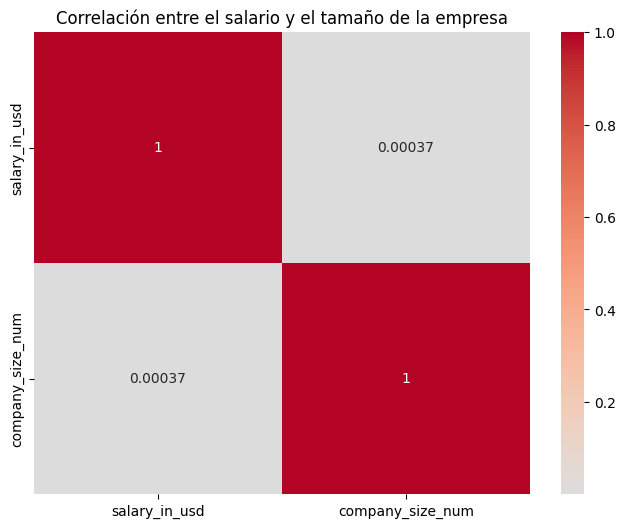


El mapa de calor muestra la correlación entre el salario y el tamaño de la empresa. 
Observamos que la correlación es cercana a cero, lo que sugiere una relación débil entre estas dos variables. 
Esto indica que el tamaño de la empresa puede no ser un factor determinante significativo en la determinación del salario. 



In [56]:
# Agrega una nueva columna al DataFrame que mapea las categorías de tamaño de empresa a valores numéricos
df['company_size_num'] = df['company_size'].map({'S': 1, 'M': 2, 'L': 3})

# Calcula la correlación entre el salario y el tamaño de la empresa
corr = df[['salary_in_usd', 'company_size_num']].corr()

# Configura el tamaño de la figura del gráfico
plt.figure(figsize=(8, 6))

# Crea un mapa de calor con los valores de correlación y los anota en el gráfico
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)

# Establece el título del gráfico
plt.title('Correlación entre el salario y el tamaño de la empresa')

# Muestra el gráfico
plt.show()

# Conclusión de los resultados
print("""
El mapa de calor muestra la correlación entre el salario y el tamaño de la empresa. 
Observamos que la correlación es cercana a cero, lo que sugiere una relación débil entre estas dos variables. 
Esto indica que el tamaño de la empresa puede no ser un factor determinante significativo en la determinación del salario. 
""")

¿Cuál es el país con más trabajadores remotos?

In [30]:
# Filtra el DataFrame para obtener solo los registros donde la proporción de trabajo remoto es del 100% y cuenta el número de trabajadores remotos por país
remote_ratio_100_by_employee_residence = df[df['remote_ratio'] == 100]['employee_residence'].value_counts()

# Imprimir resultados
print('Listado de los países con trabajo remoto al 100%:\n')

print(remote_ratio_100_by_employee_residence)

Listado de los países con trabajo remoto al 100%:

employee_residence
US    1302
GB      61
CA      45
IN      39
ES      25
DE      17
BR      16
FR      15
GR      12
MX       9
NL       8
PT       8
PL       6
AU       6
AR       6
NG       5
PK       5
PR       4
IT       3
BE       3
SI       3
IE       3
BO       2
VN       2
JP       2
PH       2
CH       2
RU       2
CF       2
CL       2
AE       2
SG       2
KE       2
MY       1
BG       1
TR       1
RS       1
LU       1
TN       1
EE       1
UA       1
UZ       1
EG       1
DO       1
SE       1
TH       1
CZ       1
SK       1
HU       1
IR       1
AT       1
CO       1
HR       1
Name: count, dtype: int64


In [57]:
# Filtra los datos para obtener solo aquellos registros donde la proporción de trabajo remoto es del 100%
remotos_100 = df[df['remote_ratio'] == 100]

# Ordena los datos por proporción de trabajo remoto
remotos_100 = remotos_100.sort_values(by='remote_ratio')

# Selecciona los 10 primeros registros para mostrar los 10 países con más trabajadores remotos al 100%
top_10_remotos_100 = remotos_100.head(110)

# Crea un gráfico de barras con el número de trabajadores remotos al 100% por país
fig = px.bar(top_10_remotos_100, 
             x='company_location',
             y='remote_ratio',
             title='Top 10 de empresas con mayor tasa de trabajadores remotos al 100%',
             template='plotly_dark')

# Actualiza las etiquetas del eje x y del eje y
fig.update_xaxes(title_text='Países')
fig.update_yaxes(title_text='Nº de remotos al 100%')

# Centra el título del gráfico
fig.update_layout(title=dict(x=0.5))

# Muestra el gráfico
fig.show()

# Conclusión de los resultados
print("""
El gráfico muestra los países con la mayor tasa de trabajadores remotos al 100%.
Sin embargo,sólo se muestra el top 10, yase observa que hay muy pocos países donde se aplique el teletrabajo al 100%, lo que sugiere que el trabajo remoto total es menos común en comparación con otros modelos de trabajo. 
Esto puede reflejar las diferentes políticas y prácticas laborales en cada país, así como las preferencias y limitaciones de las empresas y los empleados en cuanto al trabajo remoto.
Cabe destacar que Estados Unidos es el país que más aplica el trabajo remoto total, con una diferencia significativa respecto al resto de países. 
Esta observación resalta la prevalencia del trabajo remoto en la cultura laboral de Estados Unidos en comparación con otros países.
""")




El gráfico muestra los países con la mayor tasa de trabajadores remotos al 100%.
Sin embargo,sólo se muestra el top 10, yase observa que hay muy pocos países donde se aplique el teletrabajo al 100%, lo que sugiere que el trabajo remoto total es menos común en comparación con otros modelos de trabajo. 
Esto puede reflejar las diferentes políticas y prácticas laborales en cada país, así como las preferencias y limitaciones de las empresas y los empleados en cuanto al trabajo remoto.
Cabe destacar que Estados Unidos es el país que más aplica el trabajo remoto total, con una diferencia significativa respecto al resto de países. 
Esta observación resalta la prevalencia del trabajo remoto en la cultura laboral de Estados Unidos en comparación con otros países.



¿Cómo ha cambiado la proporción de trabajo remoto con el paso del tiempo?

In [59]:
# Calcula la proporción media de empleados remotos por año 
remote_work_per_year = df.groupby('work_year')['remote_ratio'].mean().reset_index()

# Crea un gráfico de líneas con la proporción media de empleados remotos a lo largo del tiempo
fig = px.line(remote_work_per_year, 
              x='work_year',
              y='remote_ratio',
              title='Proporción de empleados remotos con el paso del tiempo',
              template='plotly_dark',
              color_discrete_sequence=['green'])

# Actualiza las etiquetas del eje x y del eje y
fig.update_xaxes(title_text='Año')
fig.update_yaxes(title_text='Ratio de trabajo remoto (en %)')

# Centra el título del gráfico
fig.update_layout(title=dict(x=0.5))

# Muestra el gráfico
fig.show()

print("""
El gráfico muestra claramente la evolución de la proporción media de empleados remotos a lo largo del tiempo. 
Se observa que esta proporción experimenta un aumento significativo durante los años afectados por la pandemia de COVID-19, reflejando la rápida transición hacia el trabajo remoto en respuesta a las medidas de distanciamiento social y cuarentenas impuestas para contener la propagación del virus. 
Sin embargo, después del pico de la pandemia, se observa una disminución en la proporción de empleados remotos, indicando un retorno gradual a los modelos de trabajo presencial. 
""")


El gráfico muestra claramente la evolución de la proporción media de empleados remotos a lo largo del tiempo. 
Se observa que esta proporción experimenta un aumento significativo durante los años afectados por la pandemia de COVID-19, reflejando la rápida transición hacia el trabajo remoto en respuesta a las medidas de distanciamiento social y cuarentenas impuestas para contener la propagación del virus. 
Sin embargo, después del pico de la pandemia, se observa una disminución en la proporción de empleados remotos, indicando un retorno gradual a los modelos de trabajo presencial. 



¿Cuál es el país con los salarios promedio más altos en USD?

In [60]:
# Calcula el salario promedio por país
salario_medio_por_pais = df.groupby('company_location')['salary_in_usd'].mean().reset_index()

# Ordena los datos por salario promedio de forma descendente
salario_medio_por_pais = salario_medio_por_pais.sort_values(by='salary_in_usd', ascending=False)

# Crea un gráfico de embudo con el salario promedio por país
fig = px.funnel(salario_medio_por_pais,  
                x='company_location', 
                y='salary_in_usd', 
                title='Salario medio por país',
                color='company_location',
                template='plotly_dark')

# Actualiza las etiquetas del eje x y del eje y
fig.update_xaxes(title_text='País')
fig.update_yaxes(title_text='Salario medio ($)')

# Centra el título del gráfico
fig.update_layout(title=dict(x=0.5))

# Muestra el gráfico
fig.show()

print("""
El gráfico de embudo muestra el salario medio por país. Observamos que Israel tiene los salarios medios más altos, mostrando una diferencia significativa. 
Luego, hay una regresión liderada por Puerto Rico, Estados Unidos, Rusia y Canadá. 
Observamos que los salarios van disminuyendo a medida que avanzamos desde los países con los salarios más altos hasta los más bajos. 
Sin embargo, también observamos muchos saltos entre países, lo que indica una gran variabilidad en los salarios medios en diferentes partes del mundo. 
Esta variabilidad puede estar influenciada por una serie de factores, como el costo de vida, la economía, las políticas laborales y la demanda de habilidades en cada país.
""")


El gráfico de embudo muestra el salario medio por país. Observamos que Israel tiene los salarios medios más altos, mostrando una diferencia significativa. 
Luego, hay una regresión liderada por Puerto Rico, Estados Unidos, Rusia y Canadá. 
Observamos que los salarios van disminuyendo a medida que avanzamos desde los países con los salarios más altos hasta los más bajos. 
Sin embargo, también observamos muchos saltos entre países, lo que indica una gran variabilidad en los salarios medios en diferentes partes del mundo. 
Esta variabilidad puede estar influenciada por una serie de factores, como el costo de vida, la economía, las políticas laborales y la demanda de habilidades en cada país.



¿Cómo se distribuyen los roles de trabajo en las diferentes categorías de experiencia?

In [34]:
# Crea un gráfico de barras con el número de trabajadores por nivel de experiencia y título de trabajo
fig = px.bar(df, 
             y='experience_level',  
             x='job_title', 
             title='Distribución de los roles de trabajo en las diferentes categorías de experiencia',
             color='experience_level',  
             template='presentation') 

# Actualiza el tamaño del gráfico
fig.update_layout(height=500, width=1600)

# Actualiza la etiqueta del eje y 
fig.update_yaxes(title_text='Número de trabajadores')

# Actualiza la etiqueta del eje x para eliminarla
fig.update_xaxes(title_text='')

# Ajusta el ángulo y el tamaño de las etiquetas del eje x
fig.update_xaxes(tickangle=45, tickfont=dict(size=10))

# Centra el título del gráfico
fig.update_layout(title=dict(x=0.5))

# Muestra el gráfico
fig.show()

In [62]:
# Calcula el conteo de trabajadores por nivel de experiencia y título de trabajo o
experience_job_ds = df.groupby(['experience_level', 'job_title']).size().reset_index(name='Count')

# Crea un gráfico de treemap con el conteo de trabajadores en función del nivel de experiencia y el título de trabajo
fig = px.treemap(experience_job_ds,  
                 path=['experience_level', 'job_title'],
                 values='Count', 
                 title='Distribución de los roles de trabajo en las diferentes categorías de experiencia',
                 template='plotly_dark')

# Actualiza la etiqueta del eje y
fig.update_yaxes(title_text='Número de trabajadores')

# Centra el título del gráfico
fig.update_layout(title=dict(x=0.5))

# Muestra el gráfico
fig.show()

print("""
El gráfico de treemap ilustra la distribución de roles laborales según el nivel de experiencia y el título de trabajo. 
Podemos observar que esta distribución varía significativamente a lo largo de los niveles de experiencia.
Hay una escasez notable de puestos de trabajo para la categoría Junior, la cantidad se incrementa ligeramente en el nivel Medio y luego, hay un incrementa exponencialmente la cantidad de roles en la categoría Senior, 
mientras que en la categoría Experienced (el nivel más alto), la oferta de puestos vuelve a disminuir, siendo del conjunto el de menor puestos.
""")


El gráfico de treemap ilustra la distribución de roles laborales según el nivel de experiencia y el título de trabajo. 
Podemos observar que esta distribución varía significativamente a lo largo de los niveles de experiencia.
Hay una escasez notable de puestos de trabajo para la categoría Junior, la cantidad se incrementa ligeramente en el nivel Medio y luego, hay un incrementa exponencialmente la cantidad de roles en la categoría Senior, 
mientras que en la categoría Experienced (el nivel más alto), la oferta de puestos vuelve a disminuir, siendo del conjunto el de menor puestos.



¿Cómo varía el salario promedio entre los diferentes tipos de empleo, fulltime, partime ect?

In [54]:
# Calcula el salario promedio por tipo de empleo

avg_salary_by_employment = df.groupby('employment_type')['salary_in_usd'].mean().reset_index()

# Crea un gráfico de barras con el salario promedio por tipo de empleo
fig = px.bar(avg_salary_by_employment,
             x='employment_type',  
             y='salary_in_usd', 
             title='Salario medio por tipo de empleo',
             template='plotly_dark', 
             color_discrete_sequence=['teal']) 

# Actualiza las etiquetas del eje y y del eje x 
fig.update_yaxes(title_text='Salario medio (USD)') 
fig.update_xaxes(title_text='Tipo de empleo') 

# Centra el título del gráfico
fig.update_layout(title=dict(x=0.5))

# Muestra el gráfico
fig.show()

#### Crear un top10 con los empleos mas demandados:

In [48]:
# Obtener los 10 empleos más demandados
top10_empleos = df['job_title'].value_counts()[:10].index.tolist()

# Filtrar el DataFrame para incluir solo los 10 empleos más demandados
df_top10 = df[df['job_title'].isin(top10_empleos)]

# Crear el gráfico de pastel
fig = px.pie(df_top10, names='job_title', 
             height=600, 
             title='Top 10 de empleos más demandados en Data', 
             template='plotly_dark',
             color_discrete_sequence=px.colors.qualitative.Dark2)

# Colocar la información dentro de las secciones del pastel
fig.update_traces(textposition='inside', textinfo='percent+label')

# Centrar el título
fig.update_layout(title=dict(x=0.5))

# Mostrar el gráfico
fig.show()

####  Crear un top10 con los empleos mas cotizados:

In [49]:
# Calcula el salario promedio por título de trabajo y reinicia el índice para tener un DataFrame plano
top10_cotizados = df.groupby('job_title')['salary_in_usd'].mean().reset_index()

# Ordena los datos por salario promedio de forma descendente
top10_cotizados.sort_values(by='salary_in_usd', inplace=True, ascending=False)

# Crea un gráfico de embudo (funnel plot) con los 10 títulos de trabajo más cotizados y su salario promedio asociado
fig = px.funnel(top10_cotizados[:10], 
                y='job_title', x='salary_in_usd', 
                color='job_title', 
                title='Top 10 empleos más cotizados', 
                template='ggplot2')

# Actualiza las etiquetas del eje y y del eje x
fig.update_yaxes(title_text='Empleo')  
fig.update_xaxes(title_text='Salario medio ($)')  

# Centra el título del gráfico
fig.update_layout(title=dict(x=0.5))

# Muestra el gráfico
fig.show()

####  Crear un top10 con empleos donde podemos trabajar remoto: 

In [50]:
# Calcula el ratio promedio de trabajo remoto por título de trabajo
top10_remotos = df.groupby('job_title')['remote_ratio'].mean().reset_index()

# Redondea los valores de la columna 'remote_ratio' a dos decimales
top10_remotos['remote_ratio'] = top10_remotos['remote_ratio'].round(2)

# Selecciona los 10 primeros registros y los ordena por el ratio de trabajo remoto de forma descendente
top10_remotos_sorted = top10_remotos[:10].sort_values(by='remote_ratio', ascending=False)

# Crea un gráfico de embudo con los 10 títulos de trabajo con mayor ratio de trabajo remoto
fig = px.funnel(top10_remotos_sorted, 
                x='job_title',  
                y='remote_ratio',  
                title='Top 10 de profesiones que más trabajo remoto tienen', 
                color_discrete_sequence=['cyan'],  
                template='plotly_dark')

# Centra el título del gráfico
fig.update_layout(title=dict(x=0.5))

# Muestra el gráfico
fig.show()
